# Comparison of Symbolic Defaults to Constant Default and Random Search

Produces an image similar to:

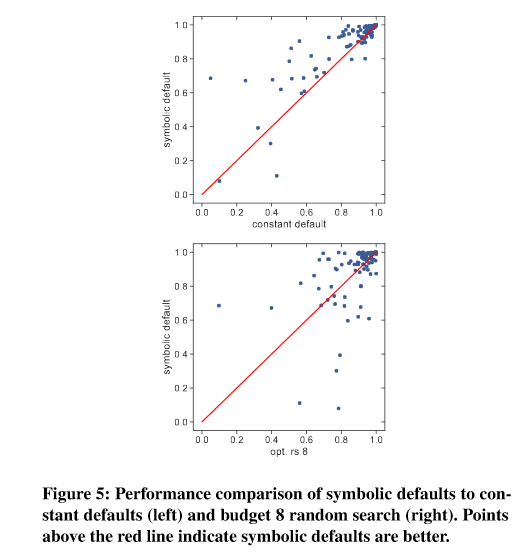

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
surrogate_performance = pd.read_csv("surrogate_performance.csv", sep=';', header=0)
opt_random_search = pd.read_csv("optimistic_random_search.csv", sep=';', header=0)
all_methods = pd.concat([surrogate_performance, opt_random_search])

In [21]:
def category_from_row(row):
    if '_' in row['optimizer']:
        return row['optimizer'].replace('_', ' ')
    elif row['optimizer'] == "mupluslambda":
        if row['constants']:
            return "constant default"
        else:
            return "symbolic default"
    else:
        raise ValueError(f"Unknown category for {row}")

all_methods["optimizer"] = all_methods.apply(category_from_row, axis=1)

In [22]:
learner = "svm"
results = all_methods[all_methods.learner == learner]
results = results.pivot(index='task', columns='optimizer', values='surrogate_score')

<AxesSubplot:xlabel='optimistic random search 4', ylabel='symbolic default'>

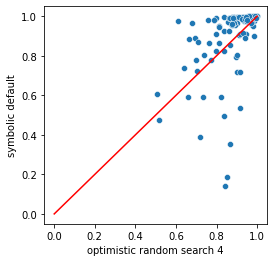

In [55]:
plt.figure(figsize=(4, 4))
ax = sns.scatterplot(data=results, x="optimistic random search 4", y="symbolic default")
sns.lineplot(x=[0, 1], y=[0, 1], ax=ax, color='red')

<AxesSubplot:xlabel='constant default', ylabel='symbolic default'>

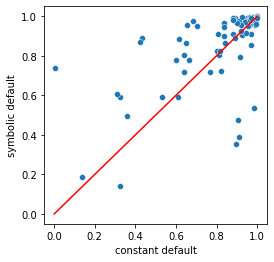

In [54]:
plt.figure(figsize=(4, 4))
ax = sns.scatterplot(data=results, x="constant default", y="symbolic default")
sns.lineplot(x=[0, 1], y=[0, 1], ax=ax, color='red')